In [ ]:
from google.colab import drive  # Mount Google Drive if using Colab

# Mount Google Drive (optional)
drive.mount('/content/drive')  # Replace '/content/drive' with your desired mount point

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (replace with your actual path)
DATA_PATH = '/content/drive/MyDrive/dataset/Training.csv'  # Modify path as needed
data = pd.read_csv(DATA_PATH)

# Print data information
print("**Data Exploration**")
print(f"\nHead:\n{data.head()}")
print(f"\nInfo:\n{data.info()}")
print(f"\nTail:\n{data.tail()}")
print(f"\nDescribe:\n{data.describe()}")

# Preprocessing
# Handling missing values
data.fillna(data.mean(), inplace=True)  # Fill missing numerical values with mean

# Encoding categorical features
encoder = LabelEncoder()
categorical_columns = ['Language', 'Sex', 'Marital', 'Field', 'Region', 'Changed_phone_number']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Splitting into features and target
X = data.drop(columns=['Has_Credit'])
y = data['Has_Credit']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Dictionary to store model accuracies
model_accuracies = {}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, preds) * 100
    model_accuracies[model_name] = accuracy

    print(f"\n**{model_name} Results:**")
    print(f"Accuracy: {accuracy:.2f}%")

    # Calculate and display additional metrics
    print("Classification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

    # Confusion Matrix visualization (optional)
    cf_matrix = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plotting bar graph to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

# Train final models on entire data
final_models = {}
for model_name in models.keys():
    final_models[model_name] = models[model_name].fit(X_scaled, y)

# Function to predict creditworthiness
def predict_creditworthiness(features):
    features_list = features.split(",")
    input_data = np.zeros(len(data.columns[:-1]))
    for feature in features_list:
        if feature in data.columns[:-1]:
            index = data.columns[:-1].get_loc(feature)
            input_data[index] = 1
    input_data_scaled = scaler.transform([input_data])

    predictions = {}
    for model_name, model in final_models.items():
        prediction = model.predict(input_data_scaled)
        predictions[model_name] = "Creditworthy" if prediction[0] == 1 else "Not Creditworthy"
    return predictions

# Function to test the credit scoring model on custom input features
def test_model(input_features):
    features_list = input_features.split(",")
    input_data = np.zeros(len(data.columns[:-1]))
    for feature in features_list:
        if feature in data.columns[:-1]:
            index = data.columns[:-1].get_loc(feature)
            input_data[index] = 1
    input_data_scaled = scaler.transform([input_data])

    predictions = {}
    for model_name, model in final_models.items():
        prediction = model.predict(input_data_scaled)
        predictions[model_name] = "Creditworthy" if prediction[0] == 1 else "Not Creditworthy"
    return predictions

# Example usage: testing the model on custom input features
input_features = "Age,Language,Sex,Marital,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number"
test_predictions = test_model(input_features)
print("Predictions for custom input features:")
for model_name, prediction in test_predictions.items():
    print(f"{model_name}: {prediction}")


In [1]:
from google.colab import drive

# Mount Google Drive (optional)
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:

# Load dataset (replace with your actual path)
DATA_PATH = '/content/drive/MyDrive/data/data_test.csv'  # Modify path as needed
data = pd.read_csv(DATA_PATH)

In [4]:
# Print data information
print("**Data Exploration**")
print(f"\nHead:\n{data.head()}")
print(f"\nInfo:\n{data.info()}")
print(f"\nTail:\n{data.tail()}")
print(f"\nDescribe:\n{data.describe()}")


**Data Exploration**

Head:
   label  Age  Language  Sex  Marital  Has_Credit  Field  Month_of_birth  \
0      0   40         1    2        4           1      0               3   
1      0   36         2    2        4           1      0               5   
2      0   31         1    2        4           1      0               7   
3      0   29         1    2        4           1      0               1   
4      0   38         1    2        4           1      0              10   

   Day_of_birth  Region  Number_of_credits  Linked_cards  INPS_mln_sum  \
0             1      12                  2             1           2.4   
1             1      13                  1             2           0.0   
2             1      13                  1             1           0.3   
3             1      13                  1             1           0.9   
4             1      13                  1             2           4.3   

   INPS_yes_no  Score_level  Score_class Score_point  Changed_phone_nu

In [10]:
# Check the distribution of the target variable
print("Distribution of the target variable:")
print(data['label'].value_counts())

# Ensure there are at least two classes in the target variable
if len(data['label'].unique()) < 2:
    raise ValueError("The target variable must have samples from at least two classes.")

# Drop redundant columns if needed
data.drop(columns=['Has_Credit'], inplace=True)  # Assuming 'Has_Credit' is redundant

Distribution of the target variable:
label
1    22
0     6
Name: count, dtype: int64


In [11]:
# Preprocessing
# Handling missing values
data.fillna(data.mean(), inplace=True)  # Fill missing numerical values with mean

# Encoding categorical features
encoder = LabelEncoder()
categorical_columns = ['Language', 'Sex', 'Marital', 'Field', 'Region', 'Changed_phone_number']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Splitting into features and target
X = data.drop(columns=['label'])
y = data['label']

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)



In [7]:
# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=18)
}


In [12]:
# Dictionary to store model accuracies
model_accuracies = {}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, preds) * 100
    model_accuracies[model_name] = accuracy

    print(f"\n**{model_name} Results:**")
    print(f"Accuracy: {accuracy:.2f}%")



**Logistic Regression Results:**
Accuracy: 100.00%

**KNN Results:**
Accuracy: 100.00%

**Random Forest Results:**
Accuracy: 100.00%


In [13]:
# Calculate and display additional metrics
print("Classification Report:\n", classification_report(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix:
 [[1 0]
 [0 5]]


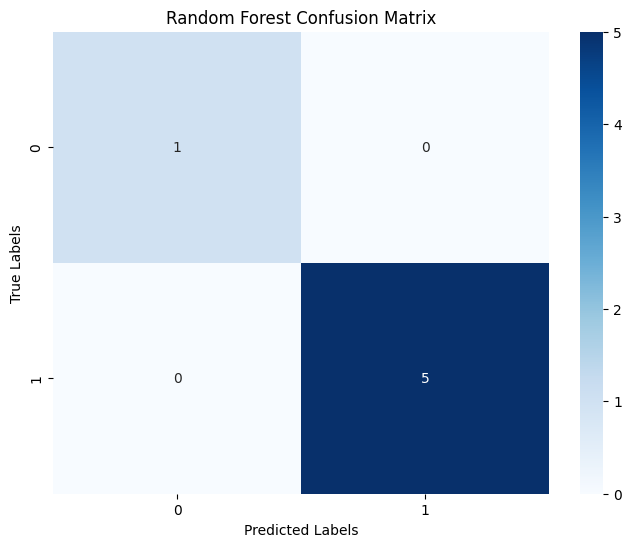

In [14]:
# Confusion Matrix visualization
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title(f"{model_name} Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

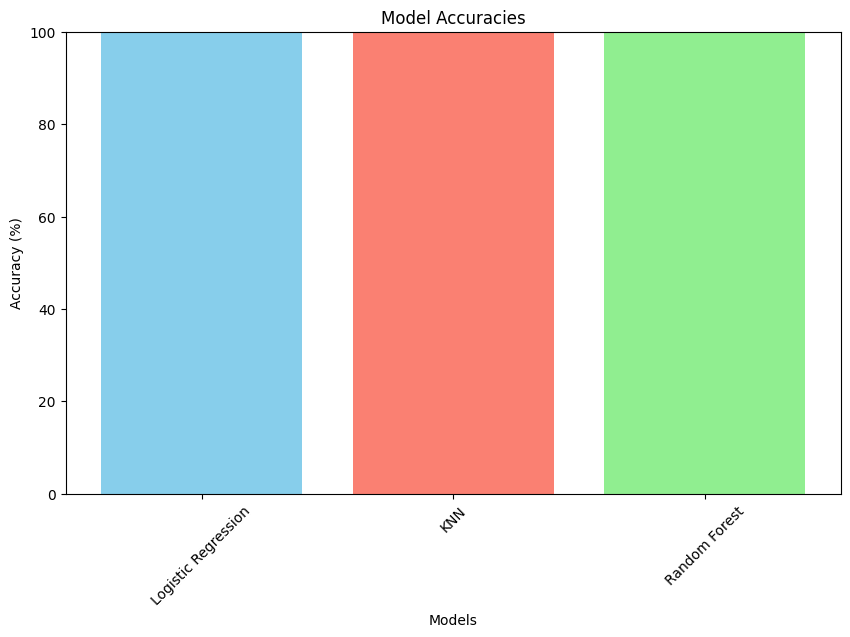

In [25]:
# Plotting bar graph to compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [16]:
# Train final models on entire data
final_models = {}
for model_name in models.keys():
    final_models[model_name] = models[model_name].fit(X_scaled, y)

In [17]:
# Function to predict creditworthiness
def predict_creditworthiness(features):
    features_list = features.split(",")
    input_data = np.zeros(len(data.columns[:-1]))
    for feature in features_list:
        if feature in data.columns[:-1]:
            index = data.columns[:-1].get_loc(feature)
            input_data[index] = 1
    input_data_scaled = scaler.transform([input_data])

    predictions = {}
    for model_name, model in final_models.items():
        prediction = model.predict(input_data_scaled)
        predictions[model_name] = "Creditworthy" if prediction[0] == 1 else "Not Creditworthy"
    return predictions

In [18]:
# Function to test the credit scoring model on custom input features
def test_model(input_features):
    features_list = input_features.split(",")
    input_data = np.zeros(len(data.columns[:-1]))
    for feature in features_list:
        if feature in data.columns[:-1]:
            index = data.columns[:-1].get_loc(feature)
            input_data[index] = 1
    input_data_scaled = scaler.transform([input_data])

    predictions = {}
    for model_name, model in final_models.items():
        prediction = model.predict(input_data_scaled)
        predictions[model_name] = "Creditworthy" if prediction[0] == 1 else "Not Creditworthy"
    return predictions


In [21]:
# Example usage: testing the model on custom input features
input_features = "35,0,1,1,2,6,15,3,2,1,5000,1,3,2,750,1"
test_predictions = test_model(input_features)
print("Predictions for custom input features (testing):")
for model_name, prediction in test_predictions.items():
    print(f"{model_name}: {prediction}")


Predictions for custom input features (testing):
Logistic Regression: Creditworthy
KNN: Creditworthy
Random Forest: Not Creditworthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Example usage: predicting creditworthiness based on input features
input_features = "35,0,1,1,2,6,15,3,2,1,5000,1,3,2,750,1"
creditworthiness_predictions = predict_creditworthiness(input_features)
print("Predictions for custom input features (creditworthiness prediction):")
for model_name, prediction in creditworthiness_predictions.items():
    print(f"{model_name}: {prediction}")

Predictions for custom input features (creditworthiness prediction):
Logistic Regression: Creditworthy
KNN: Creditworthy
Random Forest: Not Creditworthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predictions for custom input features (testing):
Logistic Regression: 0.7370239771747409
KNN: 0.8
Random Forest: 0.5


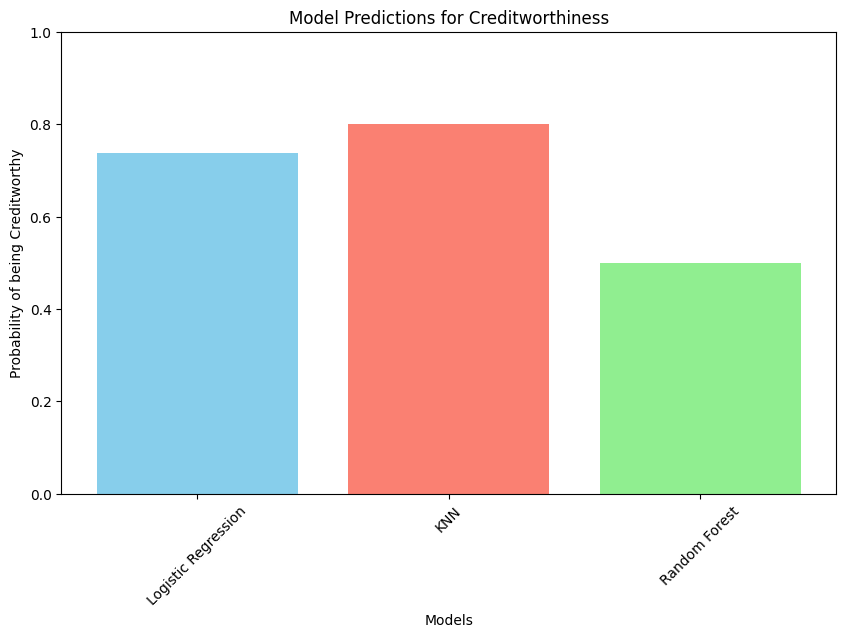

In [23]:
import matplotlib.pyplot as plt

# Function to test the credit scoring model on custom input features
def test_model(input_features):
    features_list = input_features.split(",")
    input_data = np.zeros(len(data.columns[:-1]))
    for feature in features_list:
        if feature in data.columns[:-1]:
            index = data.columns[:-1].get_loc(feature)
            input_data[index] = 1
    input_data_scaled = scaler.transform([input_data])

    predictions = {}
    for model_name, model in final_models.items():
        prediction = model.predict_proba(input_data_scaled)[:, 1]  # Get the probability of being creditworthy
        predictions[model_name] = prediction[0]
    return predictions

# Example usage: testing the model on custom input features
input_features = "35,0,1,1,2,6,15,3,2,1,5000,1,3,2,750,1"
test_predictions = test_model(input_features)
print("Predictions for custom input features (testing):")
for model_name, prediction in test_predictions.items():
    print(f"{model_name}: {prediction}")

# Plotting the visualization
plt.figure(figsize=(10, 6))
plt.bar(test_predictions.keys(), test_predictions.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Model Predictions for Creditworthiness')
plt.xlabel('Models')
plt.ylabel('Probability of being Creditworthy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
